# Data Science Challenge

### Gabriel Garcia Deitos

## Introdução

Projeto realizado com o objetivo de prever o churn (abandono de clientes) de um banco de dados fictício de uma instituição financeira. utilizando o primeiro dataset chamado Abandono_clientes composto por 10000 linhas e 13 colunas de informação (features), sendo uma coluna “Exited” composta por dados binários: 1 se o cliente abandonou o banco, 0 se não, para prever o segundo dataset que possui 1000 linhas e 12 colunas e não possui a coluna “Exited”.

In [1]:
# Imports
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## Arquivo csv

In [2]:
# Convertendo o arquivo csv para pandas dataframe 
df_churn = pd.read_csv('Abandono_clientes.csv')
df_predict_churn = pd.read_csv('Abandono_teste.csv', sep=';')

## Visualização de dados

#### Dataset de trinamento

Visualização dos dois Datasets, verificando nomes das colunas, se há números nulos, tipo de dados em cada uma e valores únicos nas colunas Geography, Gender e Surname.

In [3]:
# Visualizando 5 linhas do dataframe
df_churn.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
634,635,15738181,Douglas,850,France,Male,31,6,67996.23,2,0,0,50129.87,1
6583,6584,15613180,Miranda,727,Germany,Male,21,8,153344.72,1,1,1,163295.87,0
7978,7979,15709142,Sagese,608,Germany,Female,30,2,91057.37,2,1,0,132973.17,0
6480,6481,15693704,Tsou,679,France,Female,24,6,114948.76,2,0,1,135768.25,0
4255,4256,15596228,Uwaezuoke,490,France,Male,29,4,0.00,2,1,0,32089.57,0


In [4]:
# Verificando se há valores nulos no dataframe
df_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Visualizando os nomes das colunas
df_churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
# Visualizando os tipos de dados das colunas
df_churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
# Visualizando os valores únicos na coluna Geography
df_churn.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
# Visualizando os valores únicos na coluna Gender
df_churn.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [9]:
# Visualizando os valores únicos na coluna Surname
df_churn.Surname.unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

### Dataset para prever

In [10]:
# Visualizando 5 linhas do dataframe
df_predict_churn.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
361,10362,15670660,Craig,681,France,Male,33,2,0.00,2,1,0,12634.43
802,10803,15675187,Rose,640,Spain,Male,47,7,144859.60,1,0,1,160034.00
741,10742,15640949,Campbell,723,Germany,Female,46,9,68081.01,1,0,1,138138.62
990,10991,15602856,Faith,802,France,Female,55,4,107137.84,1,1,1,182054.40
765,10766,15794991,Weston,590,France,Male,42,4,89309.66,1,1,1,192468.85


In [11]:
# Verificando se há valores nulos no dataframe
df_predict_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [12]:
# Visualizando os nomes das colunas
df_predict_churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [13]:
# Visualizando os tipos de dados das colunas
df_predict_churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [14]:
# Visualizando os valores únicos na coluna Geography
df_predict_churn.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
# Visualizando os valores únicos na coluna Gender
df_predict_churn.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [16]:
# Visualizando os valores únicos na coluna Surname
df_predict_churn.Surname.unique()

array(['Copley', "T'ang", 'Ku', 'McConnan', "Ts'ui", 'Mackenzie',
       'Sharpe', 'Chuang', 'Seely', 'Chienezie', 'Fan', 'Allan',
       'Colombo', 'Chandler', 'Henderson', 'Macleod', 'Curley', 'Owens',
       'Cooke', 'Parkinson', 'Pratt', 'Coggins', "Ts'ai", 'Chipper',
       'Mazzi', 'Chiang', 'Connors', 'McIntyre', 'McIntosh', 'Stevens',
       'Okoli', 'Panina', 'Graham', 'Daniels', 'Kerr', 'Bethea', 'Hart',
       'Coleman', 'Stevenson', 'Watson', 'Romano', 'Tseng', 'Feng',
       'Calabresi', 'Ashton', 'Chiu', 'Tudor', 'Walters', "T'an",
       'Clisby', 'Craig', 'Bianchi', 'Rogers', 'Kryukova', 'Dean',
       'Jamieson', 'Monaldo', 'Kelly', 'Bell', 'Campbell', 'Hubbard',
       'Smith', 'Ndubuisi', 'Chen', 'Hamilton', 'Hayes', 'Kay',
       'Landreth', 'Wan', 'Tu', 'Kao', 'Michie', 'Chang', 'Choi', 'Lei',
       'Zuyev', 'Morgan', 'Douglas', 'Yeh', 'Black', 'Brookes', 'Belonwu',
       'Odinakachukwu', 'Tsui', 'Onuchukwu', 'Swanson', 'Okwuoma',
       'Eberechukwu', 'Chukwumao

## Tratando os dados a serem utilizados no treinamento do algoritmo de machine learning

Retirando a coluna Surname(por não ser importante nos dados), Geography e Gender

Pegando os valores dummies da coluna Geography e Gender e depois concatenando com o dataframe. (converte os valores da coluna gender de female e male para uma coluna chamada male tendo valores 0 ou 1; coluna geography em vez de france, germany, spain converte para duas colunas chamadas germany e spain, ambas com valores 0 ou 1)

In [17]:
df_churn_clean = df_churn.drop(['Surname'], axis=1)
churn_Geography = pd.get_dummies(df_churn_clean.Geography).iloc[:,1:]
churn_Gender = pd.get_dummies(df_churn_clean.Gender).iloc[:,1:]
df_churn_clean = df_churn_clean.drop(['Geography', 'Gender'], axis=1)
df_churn_clean = pd.concat([df_churn_clean, churn_Geography, churn_Gender], axis=1)

df_predict_churn = df_predict_churn.drop(['Surname'], axis=1)
predict_churn_Geography = pd.get_dummies(df_predict_churn.Geography).iloc[:,1:]
predict_churn_Gender = pd.get_dummies(df_predict_churn.Gender).iloc[:,1:]
df_predict_churn = df_predict_churn.drop(['Geography', 'Gender'], axis=1)

In [18]:
#Contatenando o as tabelas acima com o dataframe
df_predict_churn_clean = pd.concat([df_predict_churn, predict_churn_Geography, predict_churn_Gender], axis=1)

In [19]:
# Verificando se tudo ocorreu como esperado
df_churn_clean

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [20]:
# Verificando se ocerrou como esperado
df_predict_churn_clean

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,10001,15798485,565,31,1,0.00,1,0,1,20443.08,0,0,1
1,10002,15588959,569,34,4,0.00,1,0,1,4045.90,0,0,1
2,10003,15624896,669,20,7,0.00,2,1,0,128838.67,0,0,0
3,10004,15639629,694,39,4,173255.48,1,1,1,81293.10,0,0,1
4,10005,15638852,504,28,10,109291.36,1,1,1,187593.15,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10996,15730373,531,34,10,118306.79,1,1,0,26493.05,0,0,0
996,10997,15716191,575,49,2,136822.70,1,1,0,2487.74,1,0,1
997,10998,15673900,520,74,4,0.00,1,0,0,26742.92,0,0,0
998,10999,15581432,675,23,8,0.00,2,0,0,162342.21,0,1,1


## Dados estatísticos, médias por agrupamento, gráficos

#### Média de valores do dataframe agrupado por aqueles que sairam e os que não sairam do banco.

In [21]:
df_churn_clean.groupby('Exited').mean()
#PESSOAS QUE SAIRAM DO BANCO SÃO EM MÉDIA 7 ANOS MAIS VELHAS DO QUE AS QUE ESTÃO NO BANCO, SÃO MENOS ATIVAS(IsActiveMember) 
#E TEM MAIS DINHEIRO (Balance)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
Exited,,,,,,,,,,,,,
0,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.212859,0.259199,0.572523
1,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,0.399607,0.202749,0.440844


#### Média de valores do dataframe agrupado por gênero, sendo 0 = female e 1 = male.

In [22]:
df_churn_clean.groupby('Male').mean()
#GENDER FEMALE NORMALMENTE SAI MAIS DA EMPRESA QUE HOMENS

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
Male,,,,,,,,,,,,,
0,4942.929562,1.569115e+07,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715,0.262602,0.239709
1,5048.427891,1.569077e+07,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559,0.241158,0.254352


#### Gráfico de pessoas que sairam do banco e as que ainda estão nele.

In [23]:
df_churn_clean.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

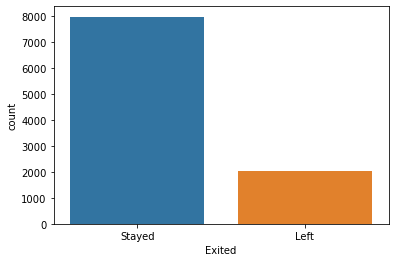

In [24]:
sns.countplot(x='Exited', data=df_churn_clean)
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

#### Gráfico de pessoas de cada pais.

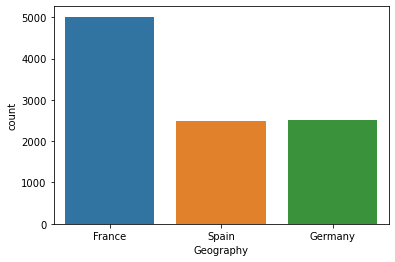

In [25]:
sns.countplot(x='Geography', data=df_churn)
plt.show()

#### Gráfico mostrando os valores de pessoas que sairam e que não do banco, agrupado por gênero.

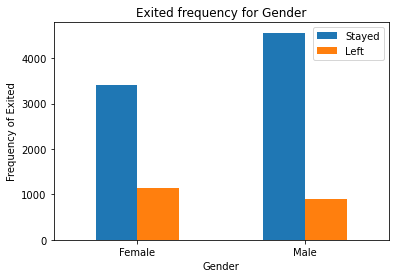

In [26]:
pd.crosstab(df_churn_clean.Male,df_churn_clean.Exited).plot(kind='bar')
plt.title('Exited frequency for Gender')
plt.legend(['Stayed', 'Left'])
plt.xticks([0, 1], ['Female', 'Male'], rotation='horizontal')
plt.xlabel('Gender')
plt.ylabel('Frequency of Exited')
plt.show()

#### Histograma de idade, faixa etaria mais frequente dos clientes do banco é entre 30 e 40 anos.

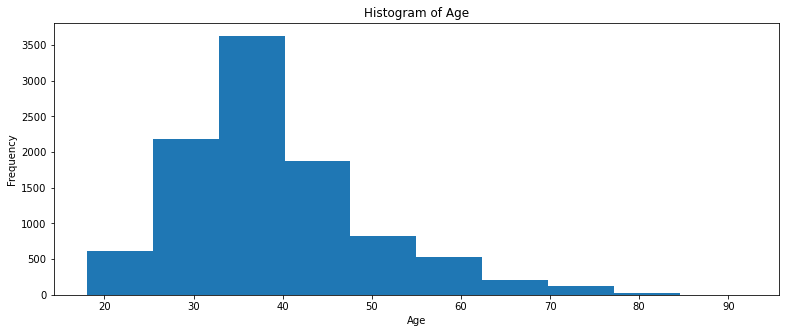

In [27]:
plt.figure(figsize=(13, 5))
plt.hist(df_churn_clean.Age)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### Gráfico de quem ficou ou saiu do banco agrupado por país

In [28]:
# Tratando dados para gerar a tabela abaixo
df_country = df_churn.groupby(df_churn['Geography']).sum().reset_index()
df_country_inverse = df_churn.copy()
df_country_inverse.Exited = df_country_inverse.Exited.map({0: 1, 1: 0})
df_country_inverse = df_country_inverse.groupby(df_country_inverse['Geography']).sum().reset_index()

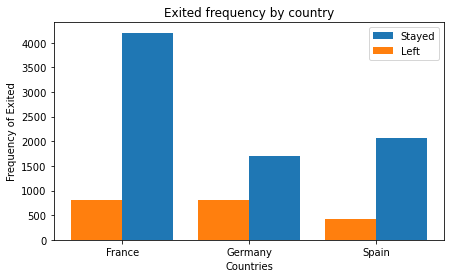

In [29]:
# Visualização da tabela de Exited frequency by country
plt.figure(figsize=(7, 4))
plt.bar(np.array([0, 1, 2]) + 0.4, df_country_inverse.Exited, width=0.4)
plt.bar([0, 1, 2], df_country.Exited, width=0.4)
plt.title('Exited frequency by country')
plt.xlabel('Countries')
plt.ylabel('Frequency of Exited')
plt.xticks(np.array([0, 1, 2]) + 0.2, labels=['France', 'Germany', 'Spain'])
plt.legend(['Stayed', 'Left'])
plt.show()

##### Gráfico de quem ficou ou saiu do banco agrupado por idade de 10 em 10 anos

In [30]:
# Bins, labels e agrupamento por age ranges para gerar as duas tabelas abaixo
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

df_age_ranges = df_churn_clean.groupby(pd.cut(df_churn_clean['Age'], bins=bins, labels=labels)).sum()
df_age_ranges.index = df_age_ranges.index.rename('range')
df_age_ranges = df_age_ranges.reset_index()

ticks = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
# Tratamento dos dados para gerar a tabela Exited frequency by age range

df_age_ranges_exited = df_churn_clean.copy() # Criando uma cópia da tabela
# Invertendo os valores da coluna male para conseguir fazer a soma das pessoas que ficaram no banco
df_age_ranges_exited.Exited = df_age_ranges_exited.Exited.map({0: 1, 1: 0})
df_age_ranges_exited = df_age_ranges_exited.groupby(pd.cut(df_churn_clean['Age'], bins=bins, labels=labels)).sum()
df_age_ranges_exited.index = df_age_ranges_exited.index.rename('range')
df_age_ranges_exited = df_age_ranges_exited.reset_index()

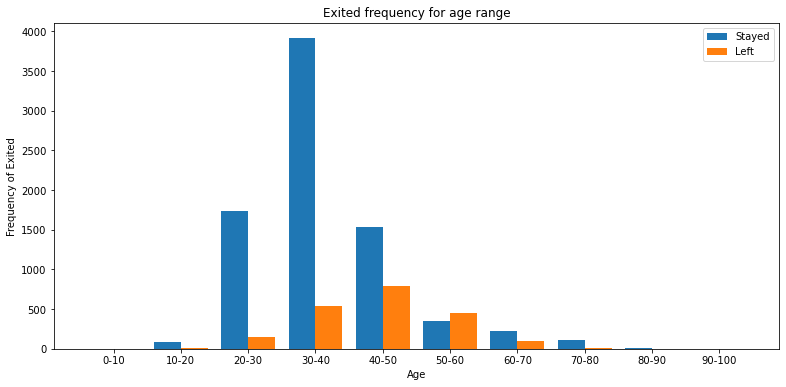

In [32]:
# Visualização da tabela Exited frequency by age range
plt.figure(figsize=(13, 6))
plt.bar(ticks, df_age_ranges_exited.Exited, width=0.4)
plt.bar(ticks + 0.4, df_age_ranges.Exited, width=0.4)
plt.xticks(ticks + 0.2, labels=labels)
plt.title('Exited frequency for age range')
plt.xlabel('Age')
plt.ylabel('Frequency of Exited')
plt.legend(['Stayed', 'Left'])
plt.show()

##### Gráfico de gênero agrupado por idade de 10 em 10 anos

In [33]:
# Tratamento dos dados para gerar a tabela Gender frequency by age range

df_age_ranges_exited_gender = df_churn_clean.copy()
# Invertendo os valores da coluna male para conseguir fazer a soma do gender female
df_age_ranges_exited_gender.Male = df_age_ranges_exited_gender.Male.map({0: 1, 1: 0}) 
df_age_ranges_exited_gender = df_age_ranges_exited_gender.groupby(pd.cut(df_churn_clean['Age'], bins=bins, labels=labels)).sum()
df_age_ranges_exited_gender.index = df_age_ranges_exited_gender.index.rename('range')
df_age_ranges_exited_gender = df_age_ranges_exited_gender.reset_index()

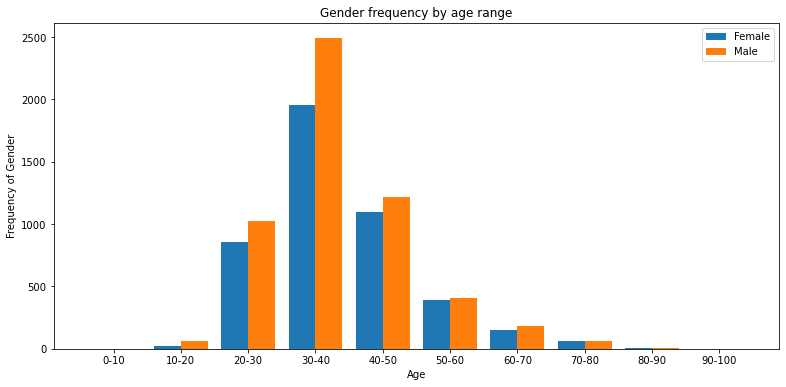

In [34]:
# Visualização da tabela Gender frequency by age range
plt.figure(figsize=(13, 6))
plt.bar(ticks, df_age_ranges_exited_gender.Male, width=0.4)
plt.bar(ticks + 0.4, df_age_ranges.Male, width=0.4)
plt.xticks(ticks + 0.2, labels=labels)
plt.title('Gender frequency by age range')
plt.xlabel('Age')
plt.ylabel('Frequency of Gender')
plt.legend(['Female', 'Male'])
plt.show()

In [35]:
"Standard Deviation CreditScore:", np.std(df_churn_clean.CreditScore)

('Standard Deviation CreditScore:', 96.64846595037113)

In [36]:
"Standard Deviation EstimatedSalary:", np.std(df_churn_clean.EstimatedSalary)

('Standard Deviation EstimatedSalary:', 57507.61722116562)

In [37]:
"Standard Deviation Balance:", np.std(df_churn_clean.Balance)

('Standard Deviation Balance:', 62394.285254125454)

In [38]:
"Amplitude CreditScore:", max(df_churn_clean.EstimatedSalary) - min(df_churn_clean.EstimatedSalary)

('Amplitude CreditScore:', 199980.90000000002)

In [39]:
"Amplitude Balance:", max(df_churn_clean.Balance) - min(df_churn_clean.Balance)

('Amplitude Balance:', 250898.09)

In [40]:
"Amplitude EstimatedSalary:", max(df_churn_clean.EstimatedSalary) - min(df_churn_clean.EstimatedSalary)

('Amplitude EstimatedSalary:', 199980.90000000002)

## Machine Learning

Retirando colunas desnecessárias para o treinamento do algoritmo.

In [41]:
X = df_churn_clean.drop(['Exited', 'CustomerId', 'RowNumber'], axis=1)
y = df_churn_clean.Exited

Separando os dados em 80% para treinar o algoritmo e 20% para testar

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Algoritmos de machine learning

Usei o método de RandomForest por ser um dos melhores no objetivo de classificar, logo após testei também com Regressão Logistíca por que o resultado esperado é apenas 0 ou 1, também sendo um bom algoritmo de classificação binaria.

Coloquei o peso das classes(colunas) como "balanced" pois os dados eram muito diferentes uns dos outros, enquanto o salário estava com valores na casa de milhares, havia colunas com valores 0 ou 1.

In [43]:
# Random Forest apresenta uma boa precisão e accuracy.
randomforest = RandomForestClassifier(n_estimators=800, class_weight="balanced")  
randomforest.fit(x_train, y_train)  
predictions = randomforest.predict(x_test)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1586
           1       0.76      0.44      0.56       414

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [45]:
print(confusion_matrix(y_test, predictions))

[[1530   56]
 [ 233  181]]


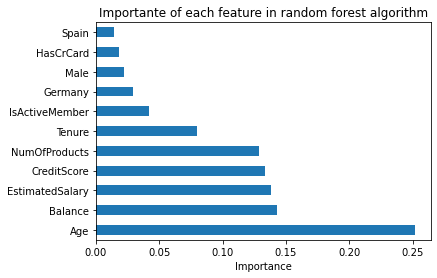

In [46]:
feature_importances = pd.Series(randomforest.feature_importances_, index=X.columns)
feature_importances.nlargest(11).plot(kind='barh')
plt.title('Importante of each feature in random forest algorithm')
plt.xlabel('Importance')
plt.show()

In [47]:
# Logistic Regression apresenta um bom recall e uma accuracy razoável.
logreg = LogisticRegression(max_iter=150, class_weight="balanced")
logreg.fit(x_train, y_train)
predictions_logreg = logreg.predict(x_test)

In [48]:
print(classification_report(y_test, predictions_logreg))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74      1586
           1       0.33      0.66      0.44       414

    accuracy                           0.65      2000
   macro avg       0.60      0.65      0.59      2000
weighted avg       0.76      0.65      0.68      2000



In [49]:
print(confusion_matrix(y_test, predictions_logreg))

[[1022  564]
 [ 142  272]]


## Conclusões

Ao meu ver, há duas formas de resolver o problema, uma, pensando em fazer com que o banco saiba as pessoas que estão prestes a sair do banco, para haver formas de contê-las na intituição, ou saber apenas saber o número mais exato possível para, por exemplo saber se há condições de expandi-lo.

Caso fosse o primeiro problema, usaria-se como medida de performance o recall e usaria-se a regressão logística, que apresentaria um número menor de falsos negativos, ou seja teria menos gente sendo classificada como que não sairia do banco mas acabasse saindo, mas em contra partida, o inverso aconteceria mais frequentemente (pessoas que seriam classificadas que sairiam do banco mas não saissem), o que não acarretaria prejuízo algum.

No segundo caso, usaria-se como medida de performance o precision que mediria a taxa de acerto e usaria-se floresta aleatória, pois apresentaria-se um número mais exato.

## Prevendo os dados

Utilizei a regressão logística pois achei que seria melhor para o banco, saber quem está prestes a sair para conseguir fazer algo a respeito.

In [50]:
x_topredict = df_predict_churn_clean.drop(['CustomerId', 'RowNumber'], axis=1)

X = df_churn_clean.drop(['Exited', 'CustomerId', 'RowNumber'], axis=1)
y = df_churn_clean.Exited

In [51]:
logregression = LogisticRegression(class_weight='balanced', max_iter=150)
logregression.fit(X, y)
predictions = logregression.predict(x_topredict)

In [52]:
predicted_values = pd.DataFrame()
predicted_values['rowNumber'] = df_predict_churn_clean.RowNumber
predicted_values['predictedValues'] = predictions.reshape(-1, 1)

In [53]:
predicted_values

,rowNumber,predictedValues
0,10001,0
1,10002,0
2,10003,0
3,10004,0
4,10005,0
...,...,...
995,10996,1
996,10997,1
997,10998,1
998,10999,0


In [55]:
predicted_values.to_csv('Teste.csv', index=False, sep=';')